[Feedback Form](https://forms.gle/D5B6Kydw35A1Kd9W9)

**Note: To capture the photo from Google colab, first two steps needs to do, if you are doing on your local system, please directly start with the actual implementation**

In [2]:
#install required lib packages
#!pip install Js2Py
#!pip install cmake
#!pip install dlib

In [1]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image

### Capture the Image

In [9]:
def take_photo():
        cam = cv2.VideoCapture(0)
        result, image = cam.read()
        print(result, image.shape)
        return image

frame=[]
n = int(input("Enter how many images you want to take "))
for i in range(n):
    frame.append(take_photo())
#cv2.imwrite("drowsyness.png", frame)
#plt.imshow(cv2.cvtColor(frame[0], cv2.COLOR_BGR2RGB))

Enter how many images you want to take 10
True (480, 640, 3)
True (480, 640, 3)
True (480, 640, 3)
True (480, 640, 3)
True (480, 640, 3)
True (480, 640, 3)
True (480, 640, 3)
True (480, 640, 3)
True (480, 640, 3)
True (480, 640, 3)


**Drowsiness Project Implementation**

In [14]:
import cv2
import numpy as np
import dlib
from imutils import face_utils

#Initializing the face detector and landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

#status marking for current state
sleep = 0
drowsy = 0
active = 0
status=""
color=(0,0,0)

## to find the euclidean distance between two points
def compute(ptA,ptB):
    dist = np.linalg.norm(ptA - ptB)
    return dist

# to compute eye aspect ratio
def blinked(a,b,c,d,e,f):
    up = compute(b,d) + compute(c,e)
    down = compute(a,f)
    ratio = up/(2.0*down)

    #Checking if it is blinked
    if(ratio>0.25):
      # 2 - ACTIVE
        return 2
    elif(ratio>0.14 and ratio<=0.25):
      # 1 - DROWSY
        return 1
    else:
      # 0 - SLEEPING
        return 0


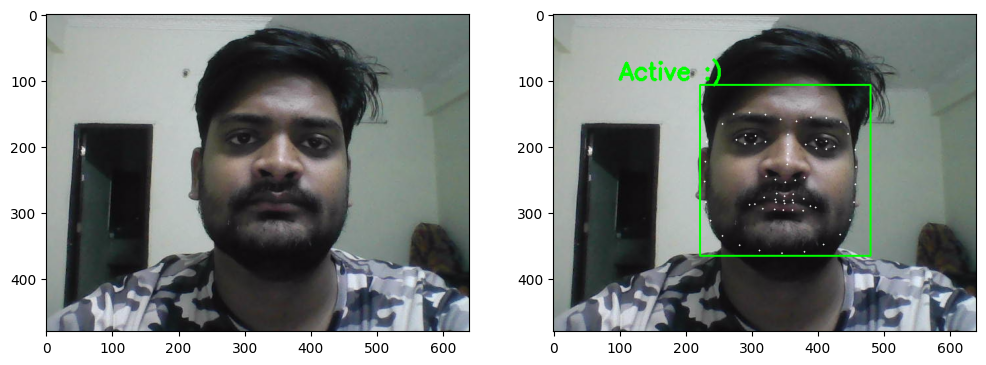

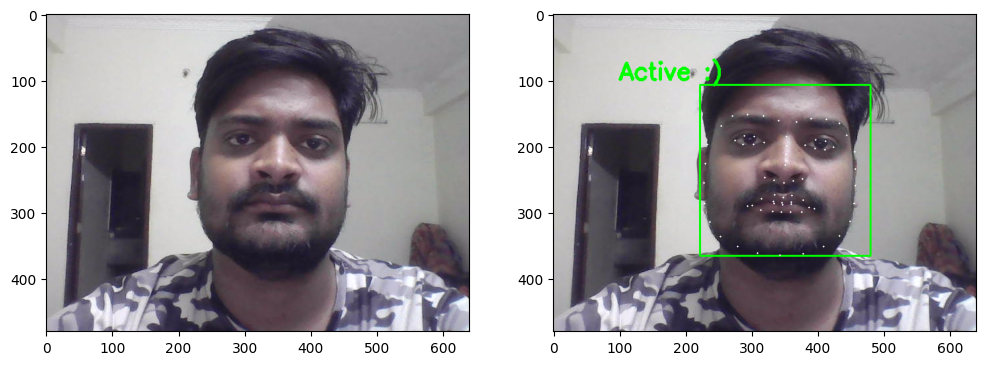

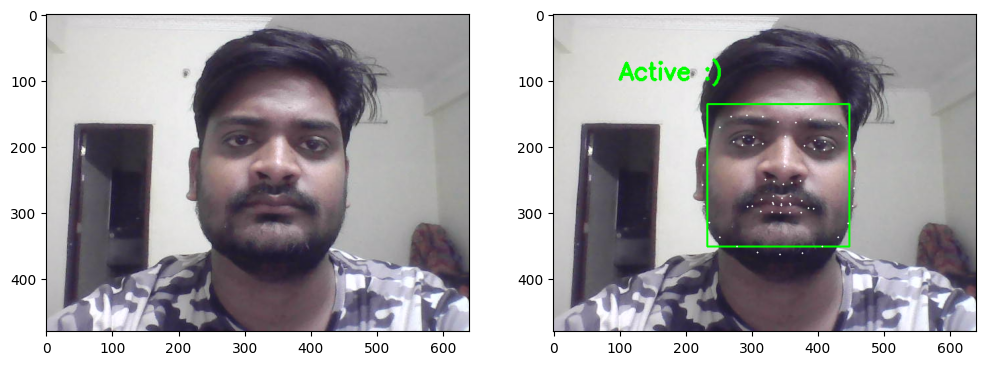

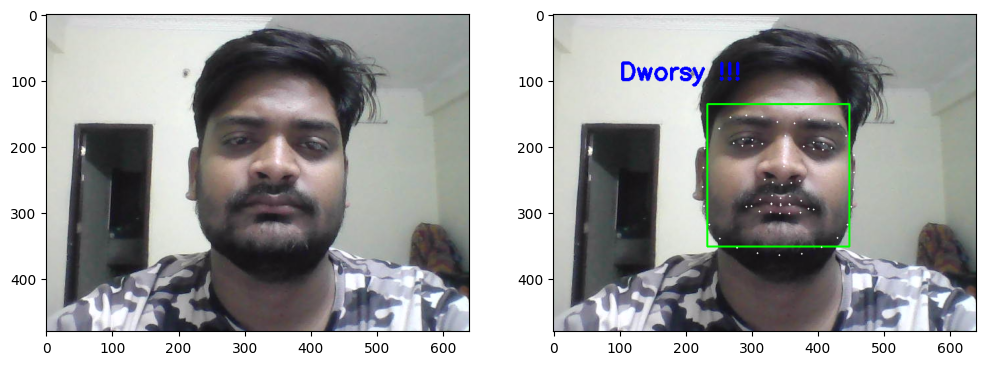

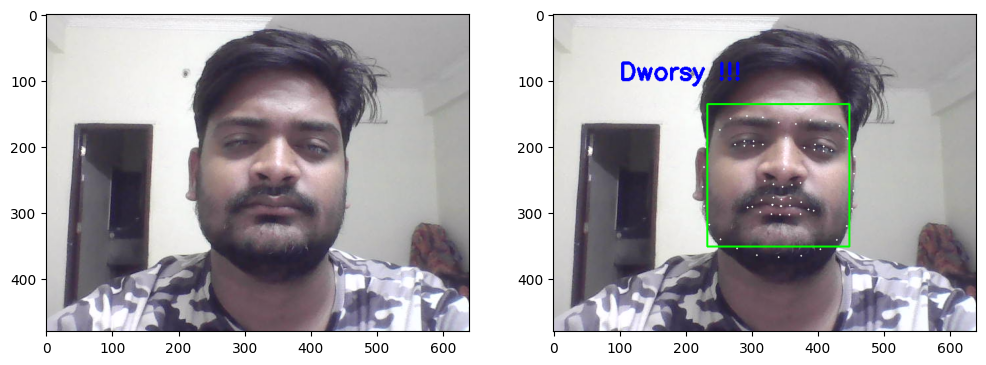

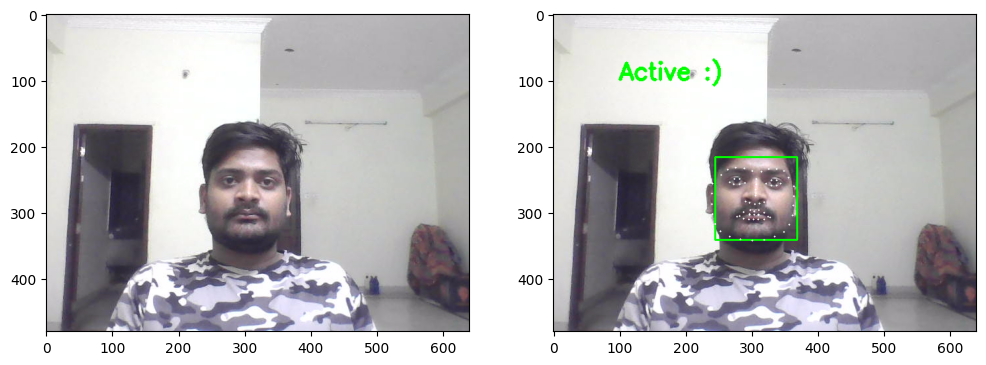

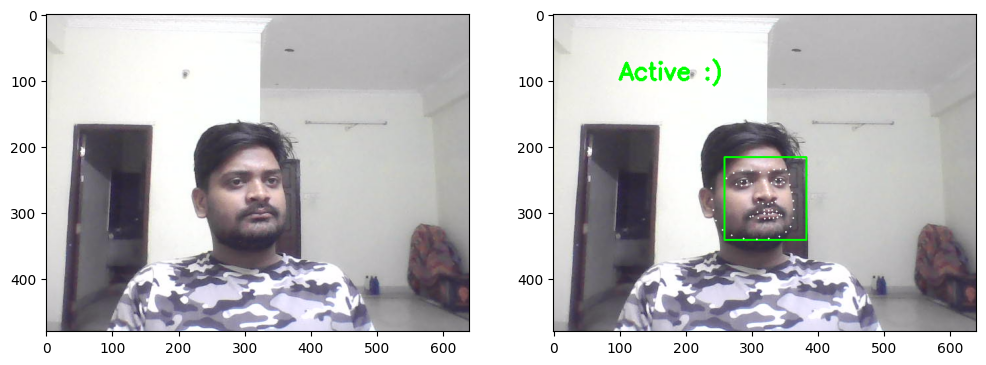

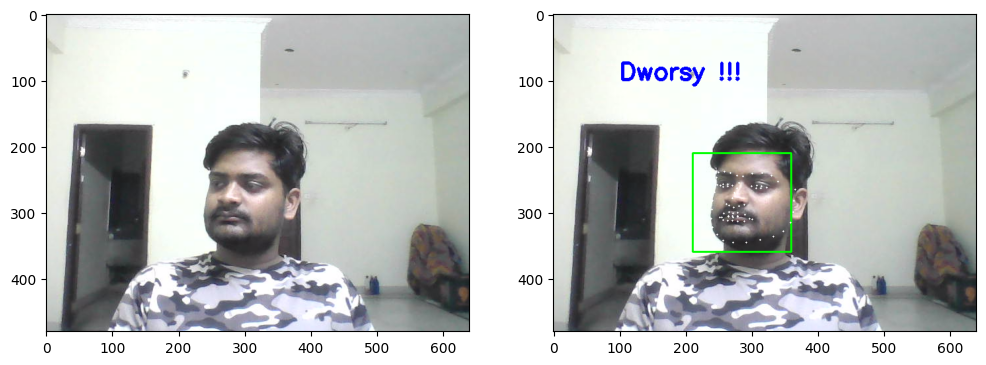

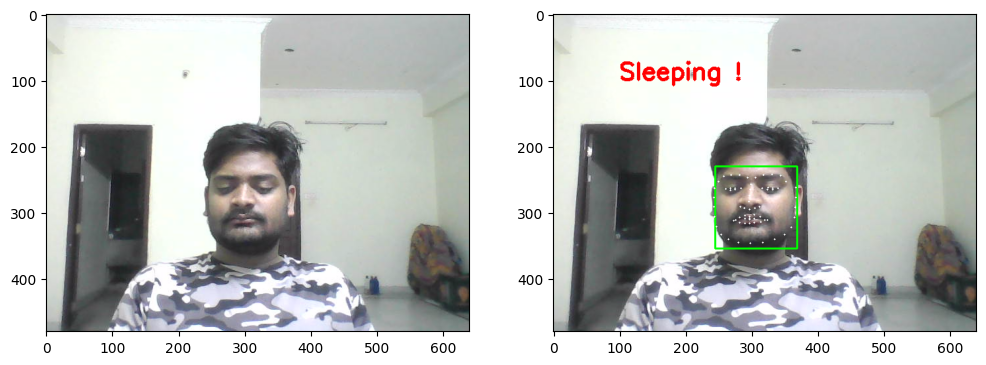

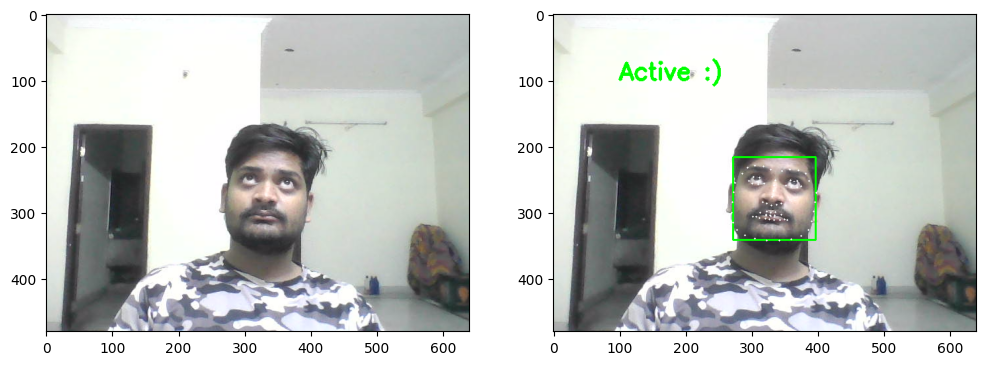

In [22]:
face_frame = []
for i in range(len(frame)):
    face_frame.append(np.copy(frame[i]))


for i in range(len(frame)):
        itr=4
        while itr>=1:
            #_, frame = img.read()
            gray = cv2.cvtColor(frame[i], cv2.COLOR_BGR2GRAY)

            faces = detector(gray)
            #detected face in faces array
            for face in faces:
                x1 = face.left()
                y1 = face.top()
                x2 = face.right()
                y2 = face.bottom()

                #face_frame = frame.copy()
                cv2.rectangle(face_frame[i], (x1, y1), (x2, y2), (0, 255, 0), 2)

                landmarks = predictor(gray, face)
                landmarks = face_utils.shape_to_np(landmarks)

                #The numbers are actually the landmarks which will show eye
                left_blink = blinked(landmarks[36],landmarks[37], 
                landmarks[38], landmarks[41], landmarks[40], landmarks[39])
                right_blink = blinked(landmarks[42],landmarks[43], 
                landmarks[44], landmarks[47], landmarks[46], landmarks[45])

                #Now judge what to do for the eye blinks
                if(left_blink==0 or right_blink==0):
                    sleep+=1
                    drowsy=0
                    active=0
                    

                elif(left_blink==1 or right_blink==1):
                    sleep=0
                    active=0
                    drowsy+=1
                    

                else:
                    drowsy=0
                    sleep=0
                    active+=1
                    
                if active == max(active , drowsy, sleep):
                    status = "Active :)"
                    color = (0,255,0)
                elif drowsy == max(active , drowsy, sleep):
                    status = "Dworsy !!!"
                    color = (255,0,0)
                else:
                    status = "Sleeping !"
                    color = (0,0,255)

                cv2.putText(face_frame[i], status, (100,100), cv2.FONT_HERSHEY_SIMPLEX, 1.2, color,3)

                for n in range(0, 68):
                    (x,y) = landmarks[n]
                    cv2.circle(face_frame[i], (x, y), 1, (255, 255, 255), -1)
                itr = itr-1
                
        
        plt.figure(figsize=(12,6))
        plt.subplot(121) 
        plt.imshow(cv2.cvtColor(frame[i], cv2.COLOR_BGR2RGB))
        plt.subplot(122)
        plt.imshow(cv2.cvtColor(face_frame[i], cv2.COLOR_BGR2RGB))
        plt.show()
